### Carga de paquetes

In [1]:
#pip install pyheif
#pip install Pillow

import numpy as np


from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt #Para graficar
from skimage.io import imshow #Para graficar las imagenes
import tensorflow as tf


import os
import glob
#from PIL import Image
import cv2

#import pyheif

import matplotlib.pyplot as plt


Seteamos los directorios done se encuentran las fotos recortadas: ORganizadas en una carpeta por persona.

In [2]:
#root_path = "C:/MaestriaDocs/DMA - Proyecto/caras_grupo4/"
root_path = "../"
#directorio_origen = root_path + "Nuestras_Caras"
#destino = root_path + "Caras_cortadas"
dir_caras_cortadas = root_path + "Caras_cortadas"

## Preparamos la matriz inicial

Obtenemos las imágenes a procesar ya recortadas desde la carpeta /Caras_cortadas
Conversión de las imágenes a un Numpy Array. Conversión de los datos a una matriz que contiene datos sin procesar. La función array by numpy toma una lista como entrada.
Redimensionamos las imagenes a 30 X 30
La imagen se agrega a un array con los 900 pixel
Cada imagen vectorizada se agraga a una matriz formando una matriz de dimensiones cantidad de imagen X 900 pixel

In [3]:
import os
import cv2
import numpy as np
from sklearn.decomposition import PCA

In [4]:
from PCA_funciones import matriz_fotos_desde_carpeta

image_matrix, image_person = matriz_fotos_desde_carpeta(dir_caras_cortadas)

Carpeta: Abel
Carpeta: Carlos
Carpeta: Federico G
Carpeta: Federico R
Carpeta: Florencia
Carpeta: Franco A
Carpeta: Franco S
Carpeta: Gerard
Carpeta: Gustavo
Carpeta: Joaquin
Carpeta: Juan
Carpeta: Lautaro
Carpeta: Lisandro
Carpeta: Marco
Carpeta: Matias
Carpeta: Natalia
Carpeta: Noelia
Carpeta: Paola
Carpeta: Victorio


In [5]:
image_matrix.shape

(6202, 900)

In [6]:
personas = np.unique(image_person)
personas

array(['Abel', 'Carlos', 'Federico G', 'Federico R', 'Florencia',
       'Franco A', 'Franco S', 'Gerard', 'Gustavo', 'Joaquin', 'Juan',
       'Lautaro', 'Lisandro', 'Marco', 'Matias', 'Natalia', 'Noelia',
       'Paola', 'Victorio'], dtype='<U10')

## PCA 

In [7]:


# Aplicar PCA y guardA

from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
import pickle

scaler = StandardScaler()
imagenes_estandarizadas = scaler.fit_transform(image_matrix)

# Guardar el escalador
ruta_scaler = root_path + 'PCA/scaler.pkl'

with open(ruta_scaler, 'wb') as f:
    pickle.dump(scaler, f)  #guardamos esto porque no vamos a tener la misma media y desvio para escalar los datos de las nuevas fotos..

pca= PCA() # pca, no filtramos por cantidad de componentes, luego lo hacemos

pca.fit(imagenes_estandarizadas)

n_inicio = 2  # Segunda componente (índice 1 en Python)
n_final = 62 # Hasta la componente 60 (índice exclusivo)
#components = pca.components_[n_inicio:n_final]

# Proyectar las imágenes al espacio de los componentes principales
projected_images = pca.transform(imagenes_estandarizadas)

# Guardar los componentes PCA
#ruta_pca = root_path + "PCA/Componentes_pca.npy"
#np.save(ruta_pca, pca.components_) ### guardamos las 900 componentes  para en el proceso posterior poder hacer una funcion que varie los componentes a utilizar para la reduccion
ruta_pca = "../PCA/Componentes_pca.npz"
np.savez(ruta_pca, components=pca.components_[n_inicio:n_final], mean=pca.mean_, labels=personas)



In [8]:
components=pca.components_[n_inicio:n_final]

### PCA-Libreria - Scree plot

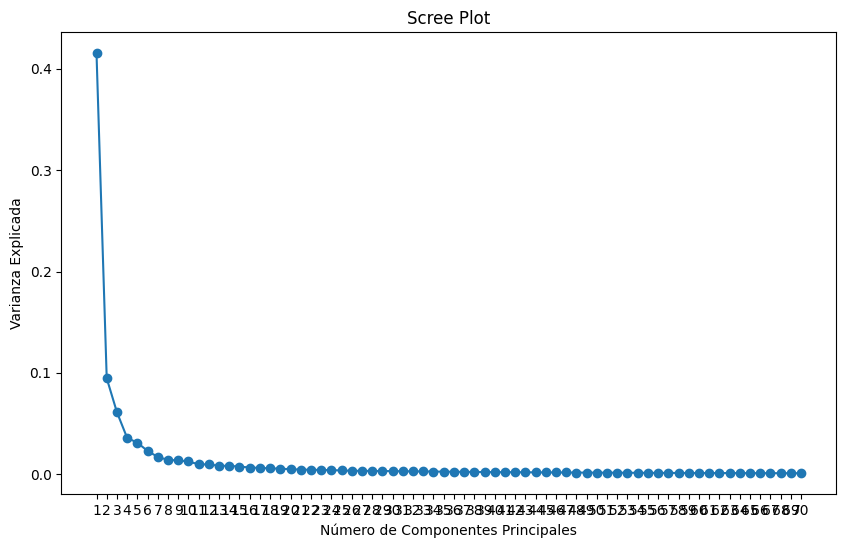

In [9]:
# Calcular las varianzas explicadas
varianza_explicada = pca.explained_variance_ratio_[:70] #el grafico hasta 900 no se podia observar bien lo acotamos
componentes_principales = np.arange(1, len(varianza_explicada) + 1)

# Crear el scree plot
plt.figure(figsize=(10, 6))
plt.plot(componentes_principales, varianza_explicada, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada')
plt.xticks(componentes_principales)
#plt.grid(True)
plt.show()

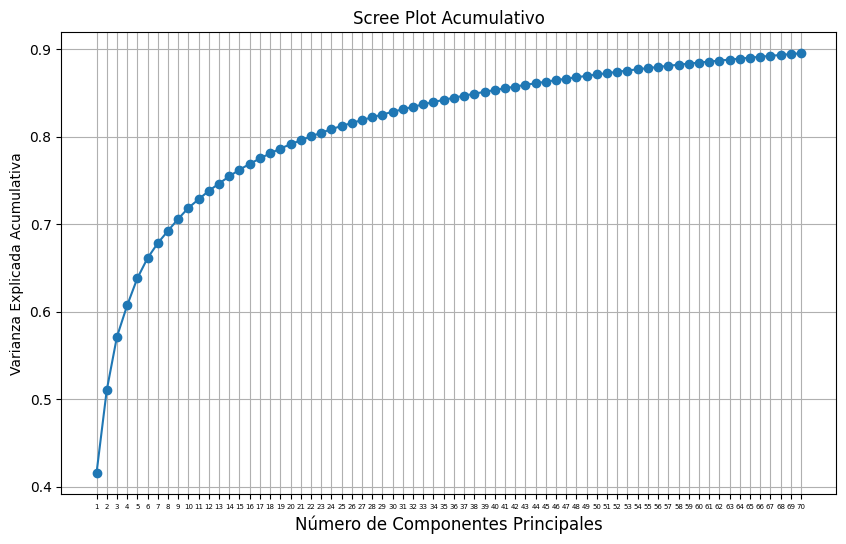

In [10]:
# Calcular la varianza explicada acumulativa
varianza_explicada = np.cumsum(pca.explained_variance_ratio_[:70])
num_componentes = len(varianza_explicada)

# Crear el scree plot acumulativo
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, num_componentes + 1), varianza_explicada, marker='o', linestyle='-')
plt.title('Scree Plot Acumulativo')
plt.xlabel('Número de Componentes Principales', fontsize=12)
plt.ylabel('Varianza Explicada Acumulativa')
plt.xticks(np.arange(1, num_componentes + 1), fontsize=5)  # Ajuste del tamaño de la fuente del eje x
plt.grid(True)
plt.show()

###  PCA-Libreria - Comparamos componentes

 Comparación de proyeccion de componentes: 1 - 2


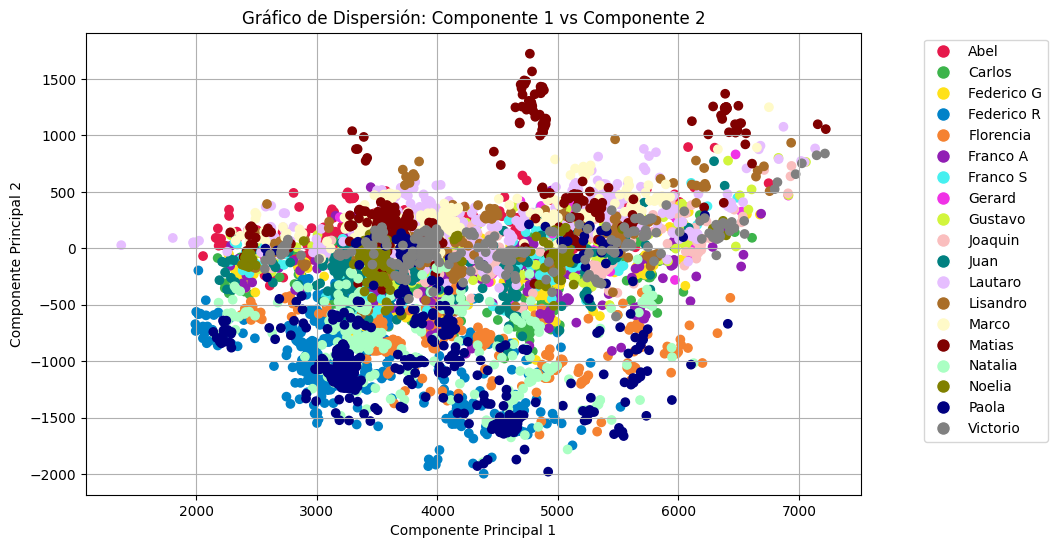

 Comparación de proyeccion de componentes: 3 - 4


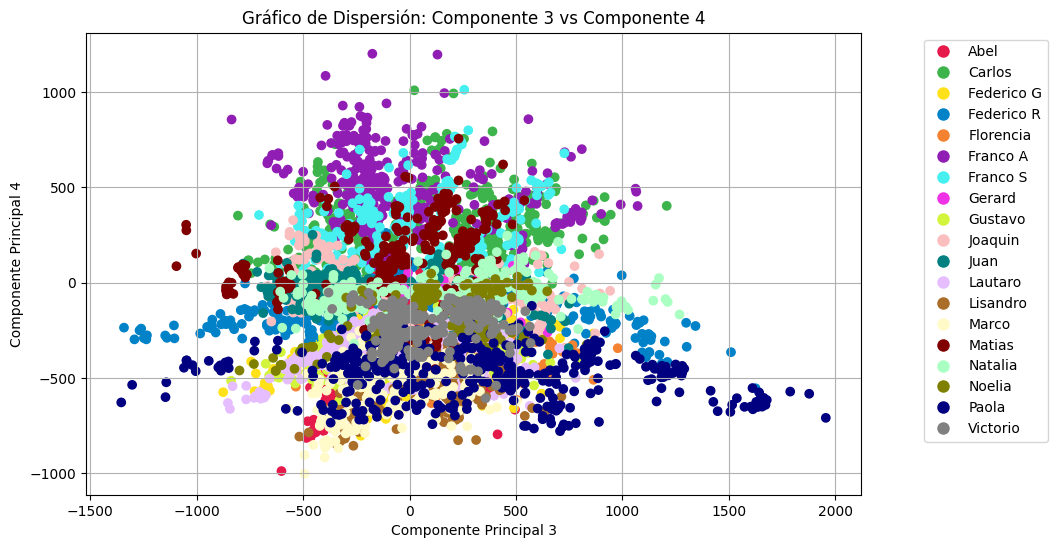

 Comparación de proyeccion de componentes: 5 - 6


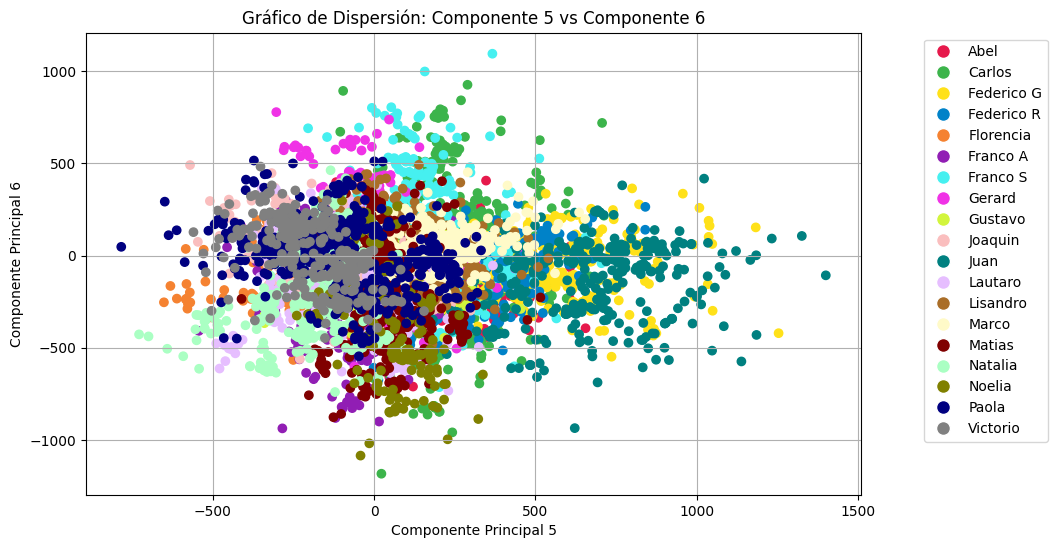

 Comparación de proyeccion de componentes: 7 - 8


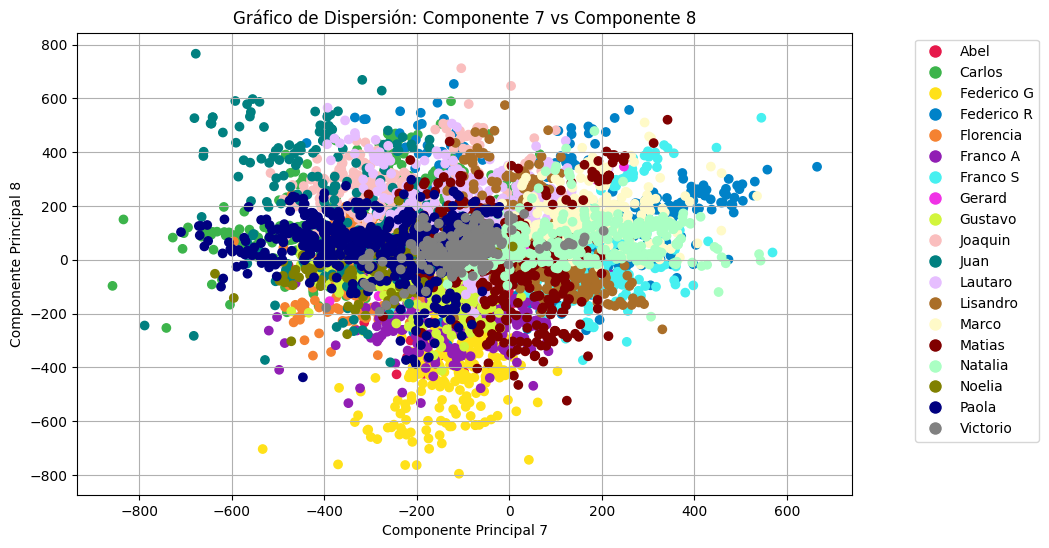

In [11]:
imagenes_transformadas = pca.transform(image_matrix)
personas = np.unique(image_person)


# Creamos una paleta de colores personalizada con 18 colores

"""paleta_colores = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
    '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5', '#c49c94', '#f7b6d2', '#c7c7c7', '#1f77b4', '#ff7f0e',
    '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#aec7e8', '#ffbb78',
    '#393b79', '#5254a3', '#6b6ecf', '#9c9ede', '#637939', '#8ca252', '#b5cf6b', '#cedb9c', '#8c6d31', '#bd9e39'
]"""

paleta_colores = [
    '#e6194b',  # Rojo brillante
    '#3cb44b',  # Verde
    '#ffe119',  # Amarillo
    '#0082c8',  # Azul
    '#f58231',  # Naranja
    '#911eb4',  # Púrpura
    '#46f0f0',  # Cian
    '#f032e6',  # Magenta
    '#d2f53c',  # Lima
    '#fabebe',  # Rosa claro
    '#008080',  # Teal
    '#e6beff',  # Lila
    '#aa6e28',  # Marrón
    '#fffac8',  # Amarillo pálido
    '#800000',  # Marrón oscuro
    '#aaffc3',  # Verde pálido
    '#808000',  # Verde oliva
    
    '#000080',  # Azul marino
    '#808080' ,  # Gris
    '#ffd8b1'  # Durazno
]
# Creamos un diccionario que asigna a cada persona un color específico
colores = {}
for i, persona in enumerate(personas):
    colores[persona] = paleta_colores[i % len(paleta_colores)]
# Convertimos los nombres de las personas en colores según el diccionario
colores_personas = [colores[persona] for persona in image_person]



for i in range(0, 8, 2):
    
    # Iteramos de 2 para ir observando relacion entre los componentes
    # Extraer los primeros dos componentes principales
    componente1 = imagenes_transformadas[:, i] #relacion de la componente1 en cada
    componente2 = imagenes_transformadas[:, i+1] #relacion de la componente2 en cada

    print(f" Comparación de proyeccion de componentes: {i+1} - {i+2}")
   
    # Crear leyenda personalizada
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colores[persona], markersize=10, label=persona) for persona in personas]

    # Crear el scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(componente1, componente2, c=colores_personas)
    plt.title(f'Gráfico de Dispersión: Componente {i+1} vs Componente {i+2}')
    plt.xlabel(f'Componente Principal {i+1}')
    plt.ylabel(f'Componente Principal {i+2}')
    plt.grid(True)
    plt.legend(handles=handles, loc='upper right', bbox_to_anchor=(1.25, 1))
    plt.show()

###  PCA-Libreria - Observamos imagenes de las primeras componentes

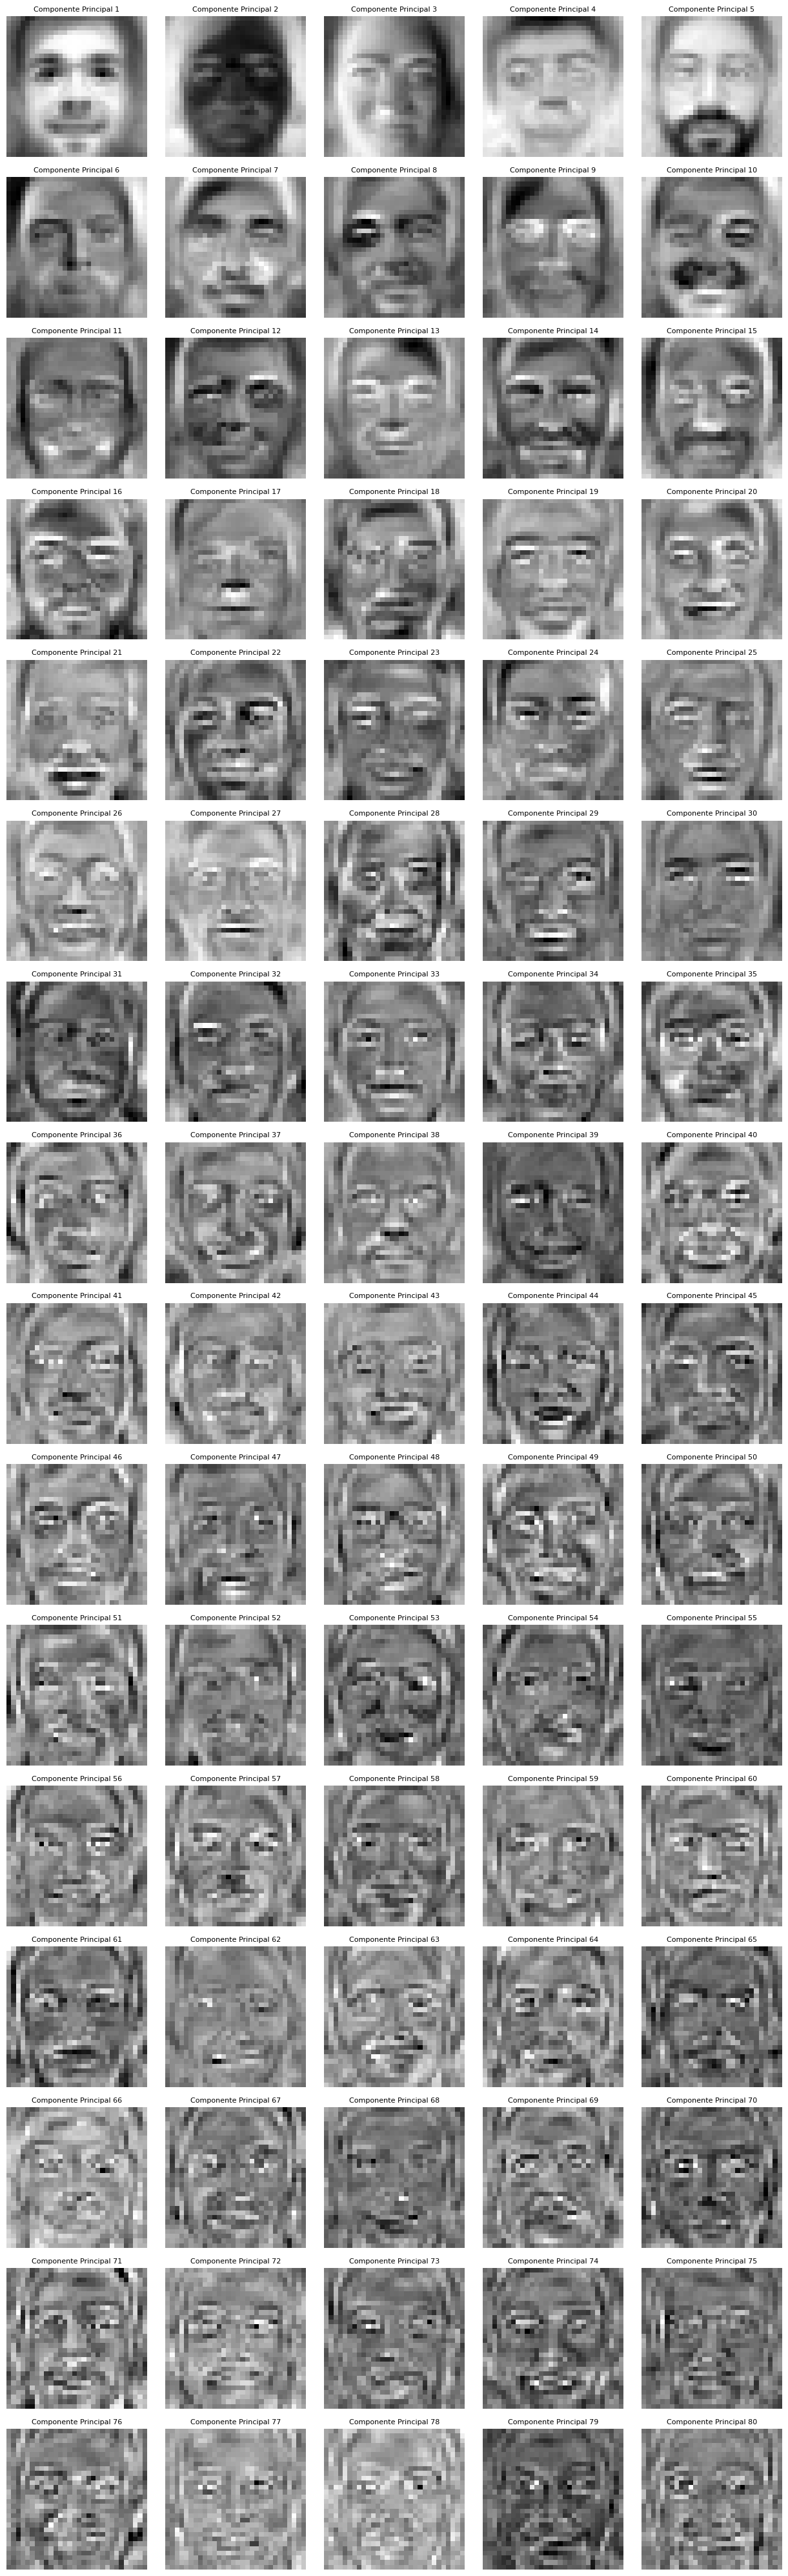

In [12]:

# observamos, imagenes armadas con los primeros 4 componentes principales
componentes=80
columnas=5
filas = componentes//columnas
fig, axs = plt.subplots(filas, columnas, figsize=(2.5*columnas, 2.5*filas))

for i in range(componentes):
    # Extrae la componente principal correspondiente
    #componente_principal = eigenvectors[:, indice_componente_principal]
    indice_componente_principal = i# Definir los números

    # Obtener la parte entera de la división
    parte_entera = (i // columnas) 

    # Obtener el resto de la división
    resto = i % columnas

    # Imprimir los resultados
    componente_principal_normalizada =  pca.components_.copy()[indice_componente_principal]
    # Convierte la componente principal normalizada en una matriz de la forma de una imagen (por ejemplo, 30x30 píxeles)
    imagen_componente_principal = componente_principal_normalizada.reshape((30, 30))

    axs[parte_entera, resto].imshow(imagen_componente_principal, cmap='gray')
    axs[parte_entera, resto].set_xticks([])
    axs[parte_entera, resto].set_yticks([])
    axs[parte_entera, resto].set_title(f'Componente Principal {indice_componente_principal + 1}', fontsize=8)
    axs[parte_entera, resto].axis('off')
  
plt.tight_layout()
plt.show()

## PCA Paso a Paso

In [13]:
import numpy as np

new_faces_array = image_matrix

#### Pca-Paso A Paso - Estandarizamos

In [14]:
# Paso 1: Calcular la media de cada característica
mean = np.mean(new_faces_array, axis=0)

# Paso 2: Calcular la desviación estándar de cada característica
std = np.std(new_faces_array, axis=0)

# Paso 3: Estandarizar los datos (restar la media y dividir por la desviación estándar)
new_faces_array_estandarizado = (new_faces_array - mean) / std #equivaente a imagenes_estandarizadas

In [15]:
new_faces_array_estandarizado

array([[ 0.3420135 ,  0.48851653,  0.76047258, ..., -0.8772389 ,
        -0.88603863, -0.85376482],
       [ 0.43174292,  0.47167806,  0.76047258, ..., -0.8585926 ,
        -0.83252166, -0.90883841],
       [ 0.88039004,  0.97683215,  1.21469968, ...,  2.19940037,
         2.82447123,  2.89123868],
       ...,
       [ 1.34698305,  1.27992461,  1.08492051, ...,  0.93145206,
         0.75514842,  0.85351618],
       [-0.0169042 , -0.33656848, -0.21287122, ...,  0.05507603,
         0.20213974, -0.5416812 ],
       [ 2.33400672,  2.1723635 ,  1.34447885, ...,  2.27398556,
         2.12875063,  1.5878306 ]])

In [16]:
imagenes_estandarizadas #observamos que es lo mismoque se obtiene opr el paquer

array([[ 0.3420135 ,  0.48851653,  0.76047258, ..., -0.8772389 ,
        -0.88603863, -0.85376482],
       [ 0.43174292,  0.47167806,  0.76047258, ..., -0.8585926 ,
        -0.83252166, -0.90883841],
       [ 0.88039004,  0.97683215,  1.21469968, ...,  2.19940037,
         2.82447123,  2.89123868],
       ...,
       [ 1.34698305,  1.27992461,  1.08492051, ...,  0.93145206,
         0.75514842,  0.85351618],
       [-0.0169042 , -0.33656848, -0.21287122, ...,  0.05507603,
         0.20213974, -0.5416812 ],
       [ 2.33400672,  2.1723635 ,  1.34447885, ...,  2.27398556,
         2.12875063,  1.5878306 ]])

### Pca-Paso A Paso - Calculamos las matrices

In [17]:
# Paso 2: Cálculo matriz de Covarianza
cov_matrix = np.cov(new_faces_array_estandarizado, rowvar=False)

In [18]:
# Paso 3: Cálculo matriz eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

In [19]:
# Paso 4: Ordenar los eigenvectors por disminución eigenvalues
sort_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sort_indices]
eigenvectors = eigenvectors[:, sort_indices]

In [20]:
# Paso 5: Elejir la cantidad de componentes principales que se desean conservar
explained_variances = eigenvalues / np.sum(eigenvalues) * 100
total_variance = np.cumsum(explained_variances) 
# calcula la suma acumulativa de los elementos en el arreglo explained_variances utilizando la función cumsum() de NumPy.

# explained_variances es un arreglo unidimensional que contiene las varianzas explicadas por cada componente principal en orden descendente 
# (es decir, el primer elemento es la varianza explicada por el primer componente principal, el segundo elemento es la suma de las varianzas explicadas 
# por el primer y segundo componentes principales, y así sucesivamente).
# El resultado de np.cumsum(explained_variances) será otro total_variance  de la misma longitud que explained_variances, 
# donde cada elemento representa la suma acumulativa de las varianzas explicadas hasta el índice correspondiente.
num_components = np.argmax(total_variance >= 90) + 1
# np.argmax(total_variance >= 95) devuelve el índice del primer elemento en el arreglo total_variance que es mayor o igual a 95. 
# Luego se le suma 1 para obtener el número de componentes principales necesario para explicar al menos el 95% de la varianza total.

print(f'Cantidad de componentes a utilizar: {num_components}')
print(explained_variances)


Cantidad de componentes a utilizar: 75
[4.15413269e+01 9.46923590e+00 6.12020934e+00 3.58510408e+00
 3.11120368e+00 2.30257343e+00 1.70477351e+00 1.41264358e+00
 1.36480693e+00 1.25729917e+00 9.81840794e-01 9.64098672e-01
 8.35760406e-01 8.22823402e-01 7.59052486e-01 6.57686879e-01
 6.27390442e-01 5.79485796e-01 5.46832516e-01 4.96490707e-01
 4.56897619e-01 4.39242395e-01 4.19968939e-01 4.05178901e-01
 3.70973186e-01 3.37593265e-01 3.34122466e-01 3.22869039e-01
 3.12889456e-01 3.06462328e-01 2.90857587e-01 2.84643334e-01
 2.75057496e-01 2.68297405e-01 2.49057952e-01 2.44249710e-01
 2.30616730e-01 2.27189242e-01 2.14444855e-01 2.04227847e-01
 2.00316498e-01 1.99762973e-01 1.92388305e-01 1.81371196e-01
 1.80233395e-01 1.75583156e-01 1.70829758e-01 1.61962342e-01
 1.59769539e-01 1.56348714e-01 1.54175836e-01 1.52985330e-01
 1.45153207e-01 1.41536117e-01 1.36110854e-01 1.31931145e-01
 1.30013486e-01 1.26370345e-01 1.19964312e-01 1.18440057e-01
 1.17078968e-01 1.15596121e-01 1.14299354e-01 

In [21]:
# Paso 6: Proyectar los datos centrados sobre la nueva base formada por los eigenvectors
new_basis = eigenvectors[:, :num_components]
new_faces_array_transformed = np.dot(new_faces_array_estandarizado, eigenvectors) #multiplicacion matricial

In [22]:
eigenvectors #equivalente a PCA component calculado previamente con la libreria

array([[-3.15298083e-02, -2.52714262e-02,  3.60333048e-02, ...,
         2.75236850e-03, -5.88267992e-05, -8.53548578e-03],
       [-2.77875419e-02, -3.68080696e-02,  3.56152103e-02, ...,
        -9.13093193e-03, -5.88542381e-03,  5.41886772e-03],
       [-2.53432081e-02, -4.76017838e-02,  3.10806206e-02, ...,
         1.05429495e-04, -5.30644975e-04,  1.15668048e-04],
       ...,
       [-2.53975994e-02, -4.96370100e-02,  3.33132561e-02, ...,
         5.78717083e-03,  7.56560916e-03, -1.29448408e-03],
       [-2.52817881e-02, -4.49169731e-02,  3.78385779e-02, ...,
         4.67276478e-04, -3.13331090e-03, -5.78223424e-03],
       [-2.72785405e-02, -4.14219928e-02,  3.67071964e-02, ...,
         6.49707007e-04,  1.61121363e-03, -5.77700997e-03]])

In [23]:
eigenvectors.T

array([[-3.15298083e-02, -2.77875419e-02, -2.53432081e-02, ...,
        -2.53975994e-02, -2.52817881e-02, -2.72785405e-02],
       [-2.52714262e-02, -3.68080696e-02, -4.76017838e-02, ...,
        -4.96370100e-02, -4.49169731e-02, -4.14219928e-02],
       [ 3.60333048e-02,  3.56152103e-02,  3.10806206e-02, ...,
         3.33132561e-02,  3.78385779e-02,  3.67071964e-02],
       ...,
       [ 2.75236850e-03, -9.13093193e-03,  1.05429495e-04, ...,
         5.78717083e-03,  4.67276478e-04,  6.49707007e-04],
       [-5.88267992e-05, -5.88542381e-03, -5.30644975e-04, ...,
         7.56560916e-03, -3.13331090e-03,  1.61121363e-03],
       [-8.53548578e-03,  5.41886772e-03,  1.15668048e-04, ...,
        -1.29448408e-03, -5.78223424e-03, -5.77700997e-03]])

In [24]:
pca.components_

array([[ 3.15298083e-02,  2.77875419e-02,  2.53432081e-02, ...,
         2.53975994e-02,  2.52817881e-02,  2.72785405e-02],
       [ 2.52714262e-02,  3.68080696e-02,  4.76017838e-02, ...,
         4.96370100e-02,  4.49169731e-02,  4.14219928e-02],
       [-3.60333048e-02, -3.56152103e-02, -3.10806206e-02, ...,
        -3.33132561e-02, -3.78385779e-02, -3.67071964e-02],
       ...,
       [ 2.75236850e-03, -9.13093193e-03,  1.05429495e-04, ...,
         5.78717083e-03,  4.67276478e-04,  6.49707007e-04],
       [-5.88267991e-05, -5.88542381e-03, -5.30644975e-04, ...,
         7.56560916e-03, -3.13331090e-03,  1.61121363e-03],
       [-8.53548578e-03,  5.41886772e-03,  1.15668048e-04, ...,
        -1.29448408e-03, -5.78223424e-03, -5.77700997e-03]])

### Pca-Paso A Paso - Scree plot

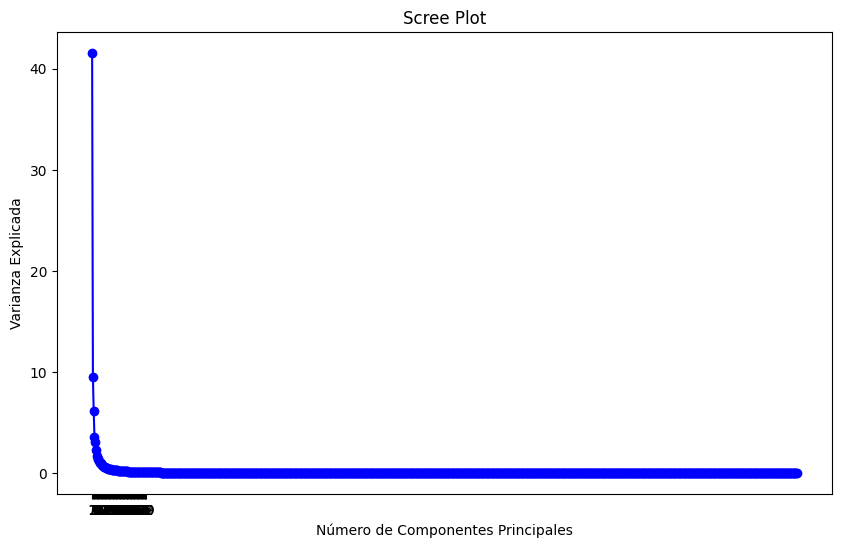

In [25]:
# Calcular las varianzas explicadas

# Crear el scree plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(explained_variances)+1), explained_variances, 'bo-')
#plt.plot(componentes_principales, explained_variances, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada')
plt.xticks(componentes_principales)
#plt.grid(True)
plt.show()

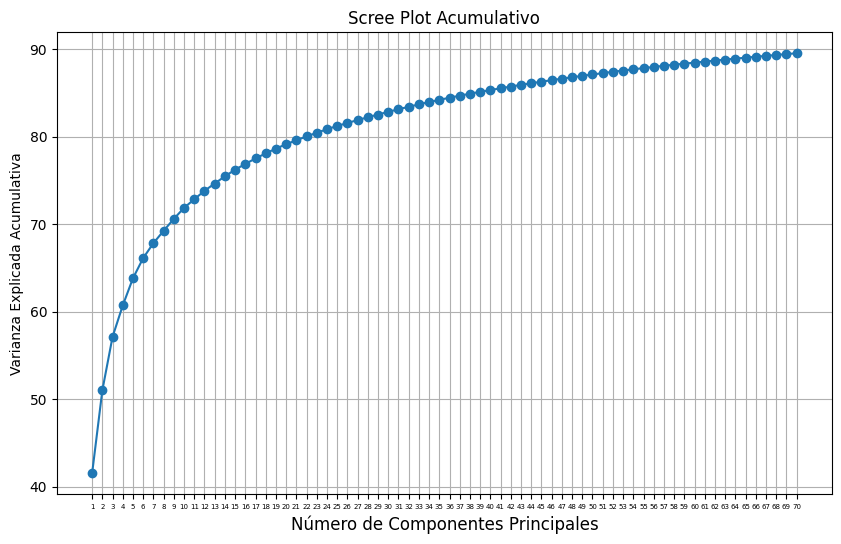

In [26]:
# Calcular la varianza explicada acumulativa
explained_variances2 = np.cumsum(explained_variances[:70])
num_componentes = len(explained_variances2)

# Crear el scree plot acumulativo
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, num_componentes + 1), explained_variances2, marker='o', linestyle='-')
plt.title('Scree Plot Acumulativo')
plt.xlabel('Número de Componentes Principales', fontsize=12)
plt.ylabel('Varianza Explicada Acumulativa')
plt.xticks(np.arange(1, num_componentes + 1), fontsize=5)  # Ajuste del tamaño de la fuente del eje x
plt.grid(True)
plt.show()

### Pca-Paso A Paso - Comparamos componentes

 Comparación de proyeccion de componentes: 1 - 2


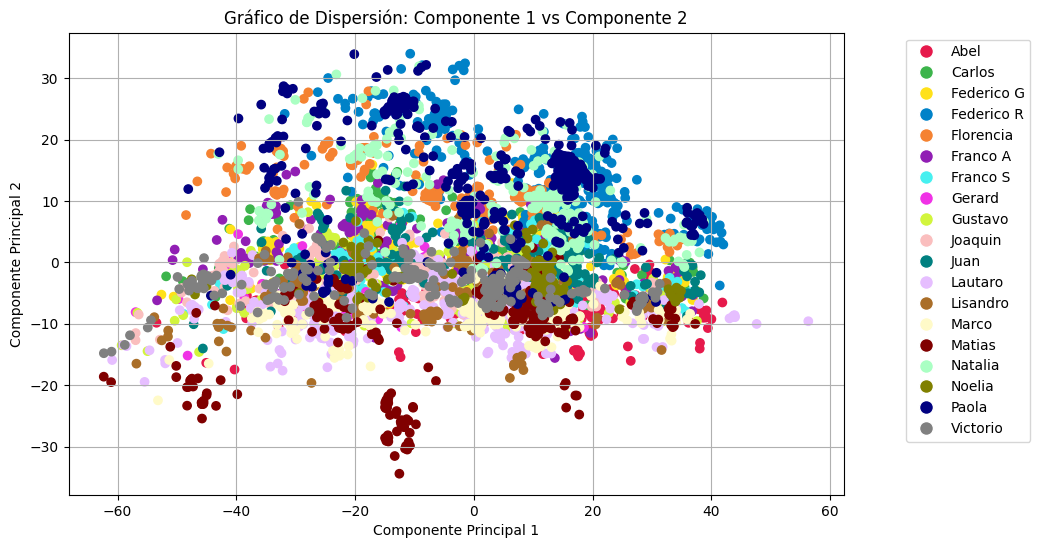

 Comparación de proyeccion de componentes: 3 - 4


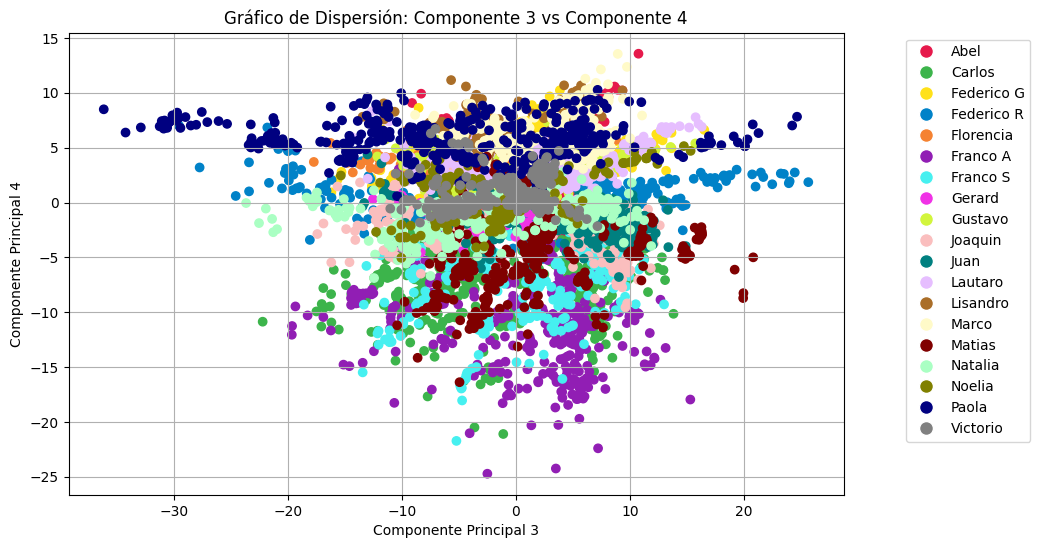

 Comparación de proyeccion de componentes: 5 - 6


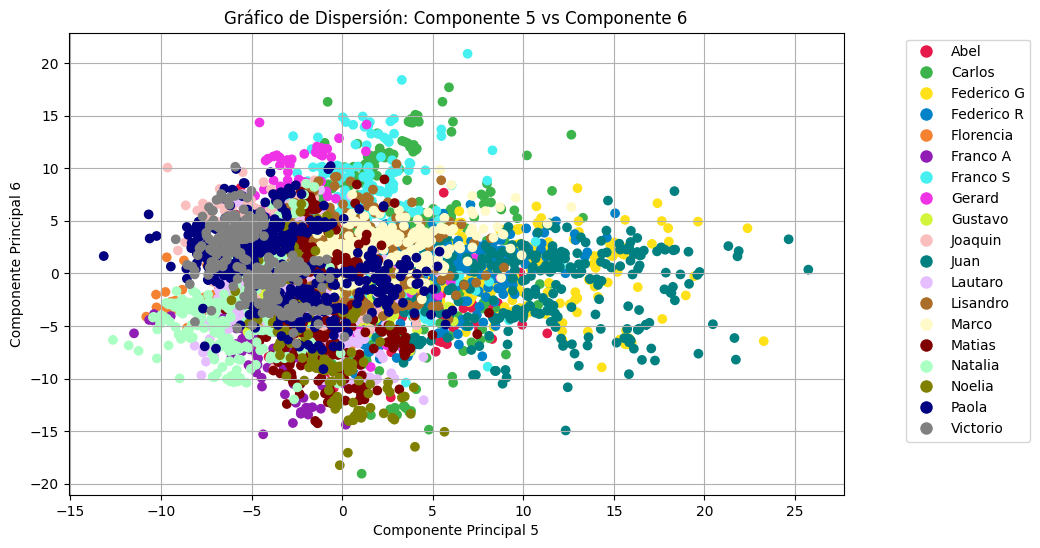

 Comparación de proyeccion de componentes: 7 - 8


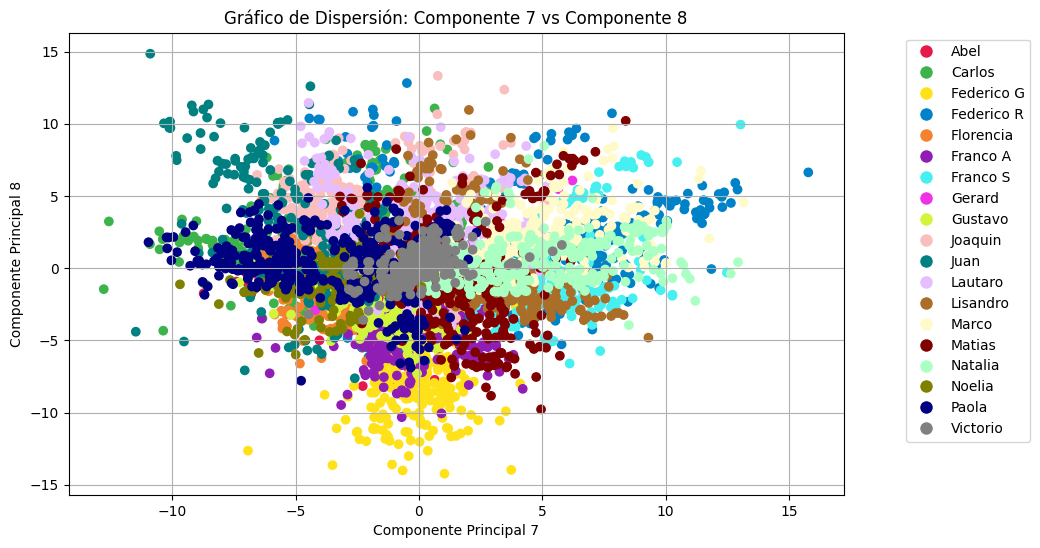

In [27]:
#imagenes_transformadas = pca.transform(image_matrix)
personas = np.unique(image_person)

new_faces_array_transformed
# Creamos una paleta de colores personalizada con 18 colores

"""paleta_colores = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
    '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5', '#c49c94', '#f7b6d2', '#c7c7c7', '#1f77b4', '#ff7f0e',
    '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#aec7e8', '#ffbb78',
    '#393b79', '#5254a3', '#6b6ecf', '#9c9ede', '#637939', '#8ca252', '#b5cf6b', '#cedb9c', '#8c6d31', '#bd9e39'
]"""

paleta_colores = [
    '#e6194b',  # Rojo brillante
    '#3cb44b',  # Verde
    '#ffe119',  # Amarillo
    '#0082c8',  # Azul
    '#f58231',  # Naranja
    '#911eb4',  # Púrpura
    '#46f0f0',  # Cian
    '#f032e6',  # Magenta
    '#d2f53c',  # Lima
    '#fabebe',  # Rosa claro
    '#008080',  # Teal
    '#e6beff',  # Lila
    '#aa6e28',  # Marrón
    '#fffac8',  # Amarillo pálido
    '#800000',  # Marrón oscuro
    '#aaffc3',  # Verde pálido
    '#808000',  # Verde oliva
    
    '#000080',  # Azul marino
    '#808080' ,  # Gris
    '#ffd8b1'  # Durazno
]
# Creamos un diccionario que asigna a cada persona un color específico
colores = {}
for i, persona in enumerate(personas):
    colores[persona] = paleta_colores[i % len(paleta_colores)]
# Convertimos los nombres de las personas en colores según el diccionario
colores_personas = [colores[persona] for persona in image_person]



for i in range(0, 8, 2):
    
    # Iteramos de 2 para ir observando relacion entre los componentes
    # Extraer los primeros dos componentes principales
    componente1 = new_faces_array_transformed[:, i] #relacion de la componente1 en cada
    componente2 = new_faces_array_transformed[:, i+1] #relacion de la componente2 en cada

    print(f" Comparación de proyeccion de componentes: {i+1} - {i+2}")
   
    # Crear leyenda personalizada
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colores[persona], markersize=10, label=persona) for persona in personas]

    # Crear el scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(componente1, componente2, c=colores_personas)
    plt.title(f'Gráfico de Dispersión: Componente {i+1} vs Componente {i+2}')
    plt.xlabel(f'Componente Principal {i+1}')
    plt.ylabel(f'Componente Principal {i+2}')
    plt.grid(True)
    plt.legend(handles=handles, loc='upper right', bbox_to_anchor=(1.25, 1))
    plt.show()

### Pca-Paso A Paso - Observamos imagenes de las primeras componentes

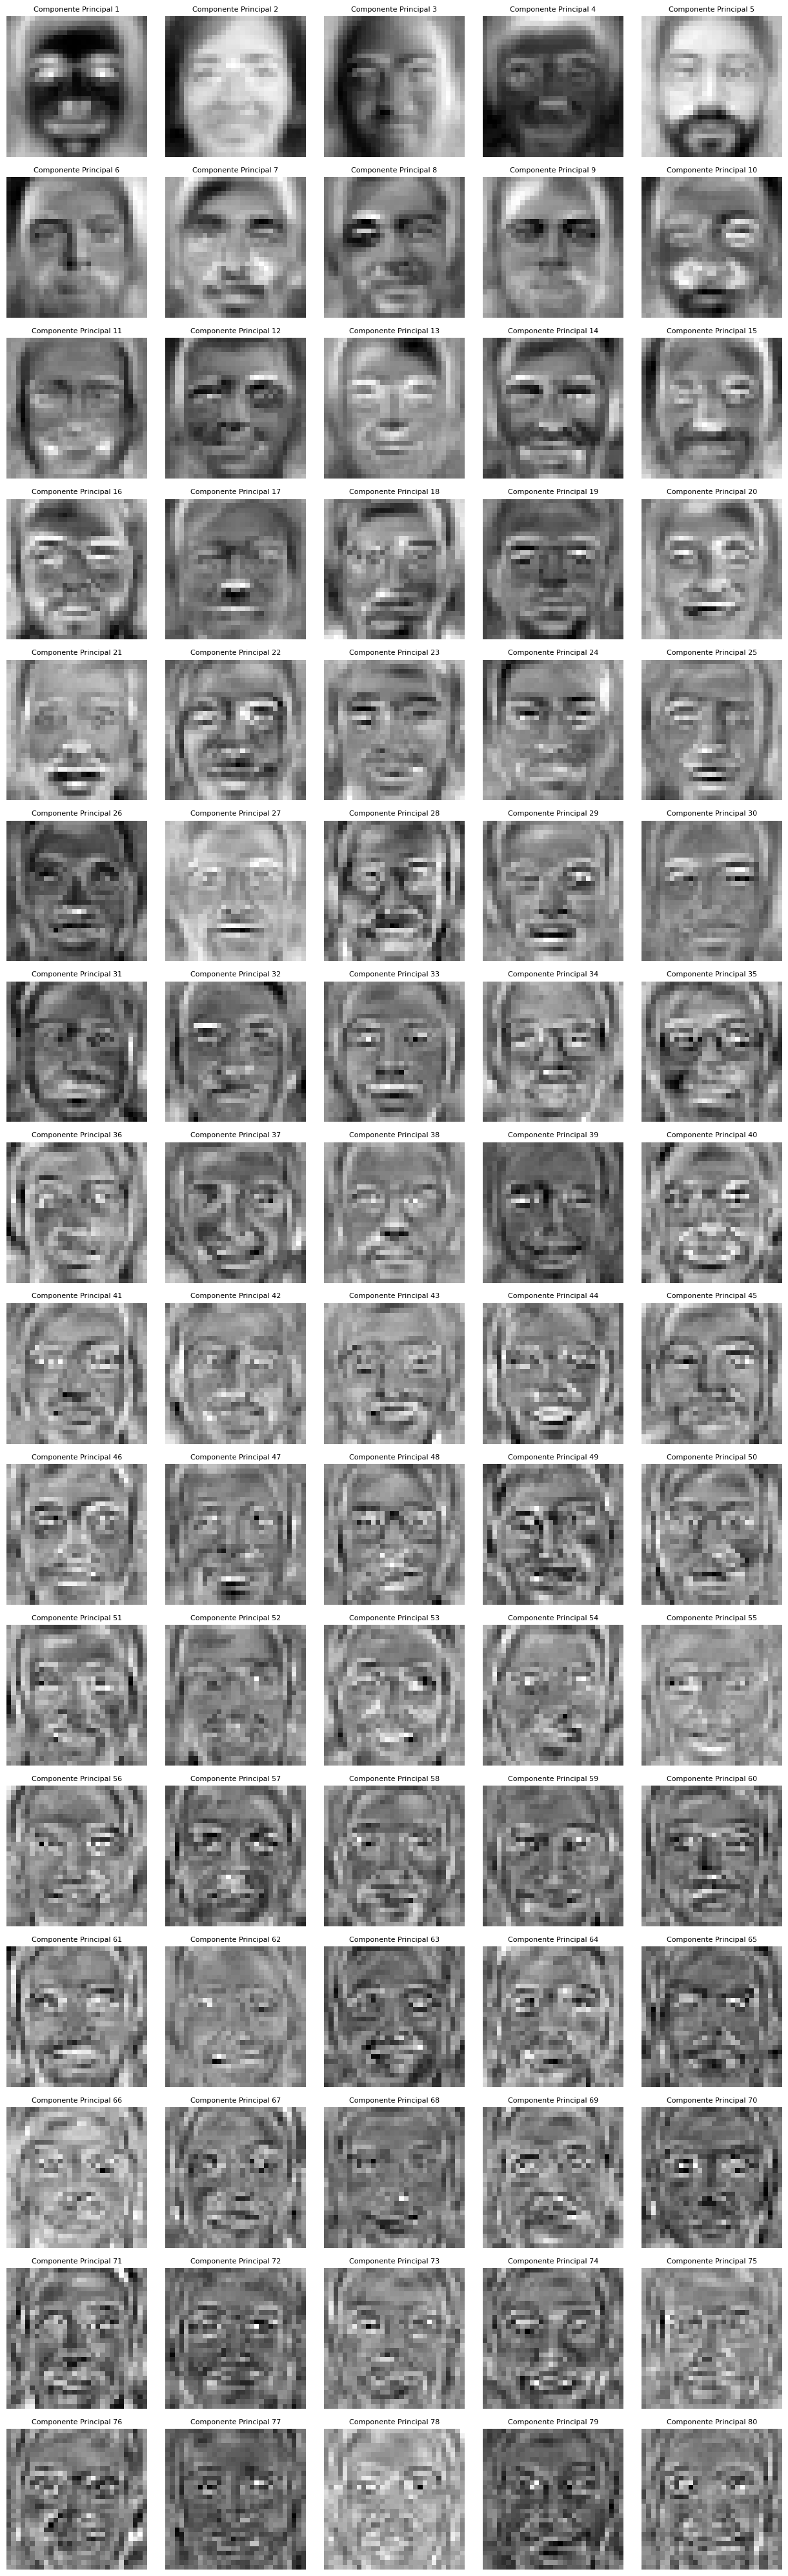

In [28]:
# observamos, imagenes armadas con los primeros  componentes principales
componentes=80
columnas=5
filas = componentes//columnas
fig, axs = plt.subplots(filas, columnas, figsize=(2.5*columnas, 2.5*filas))

for i in range(componentes):
    # Extrae la componente principal correspondiente
    #componente_principal = eigenvectors[:, indice_componente_principal]
    indice_componente_principal = i# Definir los números

    # Obtener la parte entera de la división
    parte_entera = (i // columnas) 

    # Obtener el resto de la división
    resto = i % columnas

    # Imprimir los resultados
    #componente_principal_normalizada =  pca.components_.copy()[indice_componente_principal]
    componente_principal_normalizada = eigenvectors[:, indice_componente_principal]
    # Convierte la componente principal normalizada en una matriz de la forma de una imagen (por ejemplo, 30x30 píxeles)
    imagen_componente_principal = componente_principal_normalizada.reshape((30, 30))

    axs[parte_entera, resto].imshow(imagen_componente_principal, cmap='gray')
    axs[parte_entera, resto].set_xticks([])
    axs[parte_entera, resto].set_yticks([])
    axs[parte_entera, resto].set_title(f'Componente Principal {indice_componente_principal + 1}', fontsize=8)
    axs[parte_entera, resto].axis('off')
  
plt.tight_layout()
plt.show()

In [29]:
## Back Propagation

In [30]:
# Cargar los componentes PCA guardados
#ruta_pca = root_path + "PCA/Componentes_pca.npy" #lo tenemos en memoria pero lo leemos nuevamente por si separamos el codigo
#pca_components = np.load(ruta_pca)
ruta_pca = "../PCA/Componentes_pca.npz" #lo tenemos en memoria pero lo leemos nuevamente por si separamos el codigo
#pca_components = np.load(ruta_pca)
# Cargar los datos del archivo .npz
data = np.load(ruta_pca, allow_pickle=True)

components = data['components']  # Componentes principales
#mean = data['mean']              # Media de los datos
labels = data['labels']          # Etiquetas asociadas

# Cargar el escalador
ruta_scaler = root_path + 'PCA/scaler.pkl' #
with open(ruta_scaler, 'rb') as f:
    scaler = pickle.load(f)

In [31]:


# Estandarizar las imágenes usando el escalador cargado
nuevas_imagenes_estandarizadas = scaler.transform(image_matrix)  # Escalador ya cargado

# Centrar las imágenes con la media del PCA #no es necesario si se usa scalador
#nuevas_imagenes_centradas = nuevas_imagenes_estandarizadas - mean

# Proyectar al espacio PCA
imagenes_pca_reducidas = np.dot(nuevas_imagenes_estandarizadas, components.T)


#print(imagenes_pca_reducidas)

imagenes_pca_reducidas.shape
personas = np.unique(image_person)
image_person #(vector que tiene el nombre de la persona de cada foto)
personas
personas.shape
cantidad_personas = len(personas)
print(cantidad_personas) 
cantidad_fotos = len(image_person)
cantidad_fotos

imagenes_pca_reducidas[0]

19


array([ 5.89395157e+00, -7.44321667e+00,  2.81882947e+00, -7.59920669e-02,
       -1.02469953e+00, -1.43180207e+00,  4.65092749e+00, -4.92601637e-02,
       -3.78858900e+00, -4.50051392e+00,  4.25468712e+00,  1.42800975e+00,
       -1.13170947e-02,  3.63790996e+00,  3.60405419e+00,  1.20963415e-01,
        9.72235910e-01, -3.26612310e+00,  3.98357265e-01, -1.80796571e+00,
       -8.37910220e-01,  1.38326980e-01, -8.87306691e-02,  2.06953524e+00,
        4.02742376e-01, -6.17655033e-01, -1.32230032e+00,  9.47078323e-01,
        4.48664421e-02, -1.70470783e+00, -9.55587256e-01,  1.87754635e+00,
       -1.25708654e+00, -1.35255649e+00,  8.71886683e-01,  7.91058736e-01,
        1.08185616e+00,  1.05176592e+00, -6.51233799e-01, -1.83109965e-02,
        8.08507502e-01, -5.37394802e-01, -9.08662137e-02, -5.78876500e-01,
       -2.59386565e-01,  1.31750342e-01, -6.62921828e-01,  6.69602757e-01,
        1.10494726e+00, -1.52999140e-01, -8.76945333e-01, -1.18698560e+00,
       -4.39550181e-01, -

In [32]:

from sklearn.preprocessing import  LabelBinarizer

# Convertir los valores de la var categórica en números
#salida_lista = LabelBinarizer().fit_transform(image_person) #convierte los nombres (var categorica) en vextores con un 1 en la posicion del nombre
#correspondiente, tiene un renglon por foto y el vector una columna por nombre solo un 1 en el nombre de la persona de la foto


label_binarizer = LabelBinarizer()
salida_lista = label_binarizer.fit_transform(image_person)

X = imagenes_pca_reducidas
Y = salida_lista


# Convierte la lista a un arreglo NumPy
#salida_lista = nombres_personas
salida = np.array(salida_lista)
Y = salida 


# Semilla para reproducibilidad
np.random.seed(1021) #Establece la semilla para las funciones aleatorias de numpy.  
#tf.random.set_seed(1021) #Establece la semilla para las funciones aleatorias de TensorFlow, asegurando que los pesos iniciales de la red neuronal y 4cualquier otra operación aleatoria en TensorFlow sean reproducibles.
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1021)

In [33]:
salida_lista

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [34]:
salida

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [ ]:

# Inicialización de parámetros
input_size = X_train.shape[1]  # Número de características (componentes PCA)
epoch_limit = 1000

hidden_size = X_train.shape[1]*2# Número de neuronas en la capa oculta
output_size = 19  # Número de clases (cantidad de personas)

# Inicialización de pesos y biases
np.random.seed(1021)
W1 = np.random.randn(hidden_size, input_size) * 0.01
b1 = np.zeros((hidden_size, 1))
W2 = np.random.randn(output_size, hidden_size) * 0.01
b2 = np.zeros((output_size, 1))

# Funciones de activación

from Funciones import relu
from Funciones import softmax
from Funciones import relu_derivative

# Función de pérdida: entropía cruzada

from Funciones import categorical_crossentropy

# Forward propagation

from Funciones import forward_propagation

# Backpropagation

from Funciones import backpropagation

# Entrenamiento del modelo
epochs = epoch_limit
learning_rate = 0.5
for epoch in range(epochs):
    # Forward propagation
    Z1, A1, Z2, A2 = forward_propagation(X_train, W1, b1, W2, b2)

    # Cálculo de la pérdida
    loss = categorical_crossentropy(Y_train.T, A2)

    # Aquí puedes imprimir el avance en cada epoch
    if epoch % 100 == 0 or epoch == epochs - 1:  # Imprime cada 100 epochs o el último epoch
        # Calcular precisión en el conjunto de entrenamiento
        predictions_train = np.argmax(A2, axis=0)
        labels_train = np.argmax(Y_train, axis=1)
        accuracy_train = np.mean(predictions_train == labels_train)
        
        print(f"Epoch {epoch}, Loss: {loss:.6f}, Training Accuracy: {accuracy_train * 100:.2f}%")
    
    # Backpropagation
    W1, b1, W2, b2 = backpropagation(X_train, Y_train, Z1, A1, Z2, A2, W1, W2, b1, b2, learning_rate)



Epoch 0, Loss: 2.942892, Training Accuracy: 7.92%
Epoch 100, Loss: 0.019636, Training Accuracy: 99.96%
Epoch 200, Loss: 0.007788, Training Accuracy: 99.98%
Epoch 300, Loss: 0.004548, Training Accuracy: 100.00%
Epoch 400, Loss: 0.003134, Training Accuracy: 100.00%
Epoch 500, Loss: 0.002372, Training Accuracy: 100.00%
Epoch 600, Loss: 0.001899, Training Accuracy: 100.00%
Epoch 700, Loss: 0.001578, Training Accuracy: 100.00%
Epoch 800, Loss: 0.001346, Training Accuracy: 100.00%
Epoch 900, Loss: 0.001172, Training Accuracy: 100.00%
Epoch 999, Loss: 0.001037, Training Accuracy: 100.00%


In [36]:
# Evaluación del modelo en el conjunto de prueba
Z1_test, A1_test, Z2_test, A2_test = forward_propagation(X_test, W1, b1, W2, b2)
test_loss = categorical_crossentropy(Y_test.T, A2_test)
print(f"Test Loss: {test_loss}")

# Calcular precisión en el conjunto de prueba
predictions_test = np.argmax(A2_test, axis=0)
labels_test = np.argmax(Y_test, axis=1)
accuracy_test = np.mean(predictions_test == labels_test)
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")


Test Loss: 0.01787843953871084
Test Accuracy: 99.68%


In [37]:
# Propagación hacia adelante en el conjunto de prueba
#Z1_test, A1_test, Z2_test, A2_test = forward_propagation(X_test, W1, b1, W2, b2)

# Iterar sobre las predicciones y mostrar el resultado para cada foto
for i in range(len(A2_test.T)):
    # Obtener la predicción para la i-ésima foto
    prediction = A2_test.T[i]
    
    # Encontrar la etiqueta predicha (la clase con probabilidad más alta)
    predicted_label = np.argmax(prediction)  # Identifica la clase que el modelo considera más probable para la imagen
    
    # Mostrar el resultado real y la predicción
    real_label = np.argmax(Y_test[i])
    predicted_probability = np.max(prediction)
    
    print(f"Foto {i+1}: Real = {real_label}, Predicción = {predicted_label}, Probabilidad = {predicted_probability:.4f}, Probabilidades = {prediction}")


Foto 1: Real = 4, Predicción = 4, Probabilidad = 0.9999, Probabilidades = [1.98857181e-07 1.69229435e-09 4.49797333e-10 5.07428225e-10
 9.99935332e-01 1.90178014e-08 1.05626721e-09 4.26911334e-05
 9.16428963e-07 2.09860999e-06 2.72767488e-09 3.63910982e-06
 3.76453040e-10 1.21980679e-08 8.29343431e-08 3.16246277e-09
 1.29863358e-05 1.89892980e-06 1.14560145e-07]
Foto 2: Real = 8, Predicción = 8, Probabilidad = 0.9999, Probabilidades = [4.06150592e-05 4.80140431e-09 3.56659170e-05 6.12836574e-09
 7.05689072e-07 6.47649815e-09 2.54672098e-09 3.68411998e-09
 9.99892453e-01 8.13744133e-09 1.11382360e-06 6.99566678e-10
 1.09886001e-08 1.14146369e-06 5.14421581e-09 1.04069655e-09
 8.35295685e-07 2.72605638e-05 1.59437594e-07]
Foto 3: Real = 14, Predicción = 14, Probabilidad = 0.9997, Probabilidades = [1.61211705e-06 4.82168591e-07 6.26188798e-08 5.60158502e-06
 2.50695319e-06 4.58926338e-05 1.63442271e-05 3.45071719e-06
 4.64142329e-07 2.71593772e-06 7.99380359e-07 2.64471116e-07
 1.90825060

In [38]:
# Obtener las predicciones (clase con mayor probabilidad)
y_predicho = np.argmax(A2_test, axis=0)  # axis=0 porque A2_test tiene la forma (clases, muestras)
y_testeo = np.argmax(Y_test, axis=1)  # axis=1 para obtener las etiquetas reales

# Identificar los errores de predicción
error_i = (y_predicho != y_testeo)

# Mostrar los índices donde ocurrieron los errores
print("Errores de predicción en los índices:", np.where(error_i)[0])
print("Total de errores:", np.sum(error_i))

Errores de predicción en los índices: [151 179 677 728]
Total de errores: 4


In [39]:
import pandas as pd
# Convertir índices de clases a nombres de clases
y_test_names = label_binarizer.inverse_transform(A2_test.T) #reales de test
y_pred_names = label_binarizer.inverse_transform(Y_test)


# Crear DataFrame
tabla_resultados = pd.DataFrame({
    'y_predicho': y_pred_names,
    'y_testeo': y_test_names
})
tabla_resultados['Predicción correcta'] = tabla_resultados['y_predicho'] == tabla_resultados['y_testeo']
tabla_resultados

,y_predicho,y_testeo,Predicción correcta
0,Florencia,Florencia,True
1,Gustavo,Gustavo,True
2,Matias,Matias,True
3,Carlos,Carlos,True
4,Victorio,Victorio,True
...,...,...,...
1236,Carlos,Carlos,True
1237,Gustavo,Gustavo,True
1238,Paola,Paola,True
1239,Franco A,Franco A,True


In [40]:
tabla_resultados_T=tabla_resultados[tabla_resultados['Predicción correcta'] == True]
tabla_resultados_T

,y_predicho,y_testeo,Predicción correcta
0,Florencia,Florencia,True
1,Gustavo,Gustavo,True
2,Matias,Matias,True
3,Carlos,Carlos,True
4,Victorio,Victorio,True
...,...,...,...
1236,Carlos,Carlos,True
1237,Gustavo,Gustavo,True
1238,Paola,Paola,True
1239,Franco A,Franco A,True


In [41]:
tabla_resultados_F=tabla_resultados[tabla_resultados['Predicción correcta'] == False]
tabla_resultados_F

,y_predicho,y_testeo,Predicción correcta
151,Lautaro,Abel,False
179,Gustavo,Noelia,False
677,Lisandro,Lautaro,False
728,Florencia,Paola,False


## Guardar pesos

In [42]:
ruta_modelo = os.path.join(root_path , 'Back_propagation')
ruta_modelo = os.path.join(ruta_modelo , 'Modelo')

#print(ruta_modelo_3c)
# Guardar los pesos y biases en la carpeta especificada
np.save(os.path.join(ruta_modelo, "W1.npy"), W1)
np.save(os.path.join(ruta_modelo, "b1.npy"), b1)
np.save(os.path.join(ruta_modelo, "W2.npy"), W2)
np.save(os.path.join(ruta_modelo, "b2.npy"), b2)
#np.save(os.path.join(ruta_modelo, "W3.npy"), W3)
#np.save(os.path.join(ruta_modelo, "X03.npy"), X03)